# Reducing the number of high fatality accidents

## 📖 Background
You work for the road safety team within the department of transport and are looking into how they can reduce the number of major incidents. The safety team classes major incidents as fatal accidents involving 3+ casualties. They are trying to learn more about the characteristics of these major incidents so they can brainstorm interventions that could lower the number of deaths. They have asked for your assistance with answering a number of questions.

## 💾 The data
The reporting department have been collecting data on every accident that is reported. They've included this along with a lookup file for 2020's accidents.

*Published by the department for transport. https://data.gov.uk/dataset/road-accidents-safety-data* 
*Contains public sector information licensed under the Open Government Licence v3.0.*

# 1. challenge 💪

Create a report that covers the following:

1. What time of day and day of the week do most major incidents happen?
2. Are there any patterns in the time of day/ day of the week when major incidents occur?
3. What characteristics stand out in major incidents compared with other accidents?
4. On what areas would you recommend the planning team focus their brainstorming efforts to reduce major incidents?

__Start__

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def read_df():
    global accidents 
    accidents = pd.read_csv(r"D:\BFCAI\4th\Data Analysis\Project\data\accident-data.csv")
    # lookup table(reference) for the accidents data
    global lookup
    lookup = pd.read_csv(r"D:\BFCAI\4th\Data Analysis\Project\data\road-safety-lookups.csv")

In [3]:
read_df()

__First Glance__

In [34]:
# accidents info
accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91199 entries, 0 to 91198
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   accident_index                           91199 non-null  object 
 1   accident_year                            91199 non-null  int64  
 2   accident_reference                       91199 non-null  object 
 3   longitude                                91185 non-null  float64
 4   latitude                                 91185 non-null  float64
 5   accident_severity                        91199 non-null  int64  
 6   number_of_vehicles                       91199 non-null  int64  
 7   number_of_casualties                     91199 non-null  int64  
 8   date                                     91199 non-null  object 
 9   day_of_week                              91199 non-null  int64  
 10  time                                     91199

In [35]:
accidents.head()

,accident_index,accident_year,accident_reference,longitude,latitude,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,...,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area
0,2020010219808,2020,10219808,-0.254001,51.462262,3,1,1,04/02/2020,3,...,6,0,9,9,1,9,9,0,0,1
1,2020010220496,2020,10220496,-0.139253,51.470327,3,1,2,27/04/2020,2,...,6,0,0,4,1,1,1,0,0,1
2,2020010228005,2020,10228005,-0.178719,51.529614,3,1,1,01/01/2020,4,...,6,0,0,0,4,1,2,0,0,1
3,2020010228006,2020,10228006,-0.001683,51.541210,2,1,1,01/01/2020,4,...,6,0,0,4,4,1,1,0,0,1
4,2020010228011,2020,10228011,-0.137592,51.515704,3,1,2,01/01/2020,4,...,5,0,0,0,4,1,1,0,0,1


__to-do__
1. Date & Time tables datatypes are object
2. Convert each int-column value (if necessary) to its own label reference. i.e (accident_severity)

In [36]:
# lookup info
lookup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   table        129 non-null    object
 1   field name   129 non-null    object
 2   code/format  121 non-null    object
 3   label        119 non-null    object
 4   note         10 non-null     object
dtypes: object(5)
memory usage: 5.2+ KB


In [37]:
lookup.tail()

,table,field name,code/format,label,note
124,Accident,carriageway_hazards,9,unknown (self reported),NaN
125,Accident,urban_or_rural_area,1,Urban,field introduced in 1994
126,Accident,urban_or_rural_area,2,Rural,field introduced in 1994
127,Accident,urban_or_rural_area,3,Unallocated,field introduced in 1994
128,Accident,urban_or_rural_area,-1,Data missing or out of range,field introduced in 1994


__to-do__: 
1. Define a function to replace each int-column code (if not null) with its label
2. Define a function so once you give it a label, it show you the corresponding note

In [26]:
# if you need more explination unhash the following code
# for f, c, l in lookup.values:
#     if c is not np.nan:
#         print(f, c, l)

# 1. Pre-Processing

In [4]:
# the replace function
def to_replace(df):
    temp = lookup[['field name', 'code/format', 'label']]  # dont need the table column
    for f, c, l in temp.values:  # for each field, code, label
        if c is not np.nan:
            try:
                df[f].replace(int(c), l, inplace=True)
            except:
                continue

In [5]:
# show each note for a corresponding label
def know_note(*labels):
    for label_name in labels:
        print(lookup[lookup.label == label_name][['field name', 'label', 'note']])

In [6]:
to_replace(accidents)

# un-hash the following line of code to see the changes
# accidents 

In [8]:
accidents.tail()

,accident_index,accident_year,accident_reference,longitude,latitude,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,...,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area
91194,2020991027064,2020,991027064,-2.926320,56.473539,Serious,2,1,12/08/2020,Wednesday,...,B,959,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,Urban
91195,2020991029573,2020,991029573,-4.267565,55.802353,Slight,1,1,13/11/2020,Friday,...,Unclassified,first_road_class is C or Unclassified. These r...,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,Urban
91196,2020991030297,2020,991030297,-2.271903,57.186317,Serious,2,1,15/04/2020,Wednesday,...,Unclassified,first_road_class is C or Unclassified. These r...,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,Rural
91197,2020991030900,2020,991030900,-3.968753,55.950940,Slight,2,1,15/12/2020,Tuesday,...,Unclassified,first_road_class is C or Unclassified. These r...,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,Urban
91198,2020991032575,2020,991032575,-4.561040,56.003843,Slight,1,1,25/08/2020,Tuesday,...,Unclassified,first_road_class is C or Unclassified. These r...,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,Other object on road,Urban


In [68]:
# un-hash the following line of code to try the know_note function
# know_note('Urban')

__Null & Duplicated values__

In [4]:
# if you made a mistake with data just run it from here:
read_df()
to_replace(accidents)

In [7]:
accidents.isna().sum() / accidents.shape[0]

accident_index                             0.000000
accident_year                              0.000000
accident_reference                         0.000000
longitude                                  0.000154
latitude                                   0.000154
accident_severity                          0.000000
number_of_vehicles                         0.000000
number_of_casualties                       0.000000
date                                       0.000000
day_of_week                                0.000000
time                                       0.000000
first_road_class                           0.000000
first_road_number                          0.000000
road_type                                  0.000000
speed_limit                                0.000000
junction_detail                            0.000000
junction_control                           0.000000
second_road_class                          0.000000
second_road_number                         0.000000
pedestrian_c

__Its not needed to remove it now__

In [8]:
accidents.duplicated().sum()

0

__Convert the Date, Time columns to the right format__

In [84]:
# date column
accidents.date.dtype

dtype('O')

In [9]:
accidents.date = pd.to_datetime(accidents.date)

In [10]:
# time column
accidents.time.dtype

dtype('O')

In [11]:
# Convert the "time" column to datetime format
accidents['time'] = pd.to_datetime(accidents['time'], format='%H:%M')

In [13]:
# accidents.info()

# 3. EDA

### 3.1 Question #1: _What time of day and day of the week do most major incidents happen?_

__we have 4 columns responsible for date & time__
1. time
2. date
3. day of week
4. accident year

In [103]:
# accidents.columns

In [14]:
# Extract the hour from the datetime objects and store in a new column called "hour"
accidents['hour'] = accidents['time'].dt.hour

In [15]:
print('*Freq Of Hours*')
print('Hour\tFreq')
accidents.hour.value_counts(normalize=True).sort_values(ascending=False)

*Freq Of Hours*
Hour	Freq


17    0.085670
16    0.080933
15    0.080714
18    0.072567
14    0.068477
13    0.062950
12    0.059156
8     0.057753
19    0.055351
11    0.052764
10    0.045757
9     0.042950
7     0.040965
20    0.040735
21    0.034057
22    0.028016
6     0.020066
23    0.019693
0     0.013026
1     0.010033
5     0.009375
2     0.007215
3     0.006206
4     0.005570
Name: hour, dtype: float64

__Make Time Interval Column__

In [16]:
# Define the time intervals
bins = [0, 6, 12, 18, 24]
labels = ['night', 'morning', 'afternoon', 'evening']

# Bin the hour values into the intervals defined above and store in a new column called "time_interval"
accidents['time_interval'] = pd.cut(accidents['hour'], bins=bins, labels=labels, include_lowest=True)

In [137]:
# accidents[['time_interval', 'hour']]

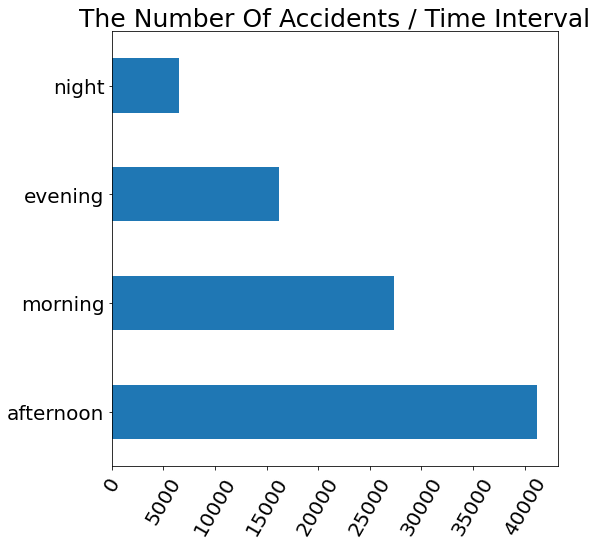

In [148]:
plt.figure(figsize=(8, 8))
accidents.time_interval.value_counts().plot(kind='barh', fontsize=20)
plt.xticks(rotation=60)
plt.title('The Number Of Accidents / Time Interval', fontsize=25)
plt.show()

__Conclusion: Most Of Accidents Happened Between 12: 6 P.M__

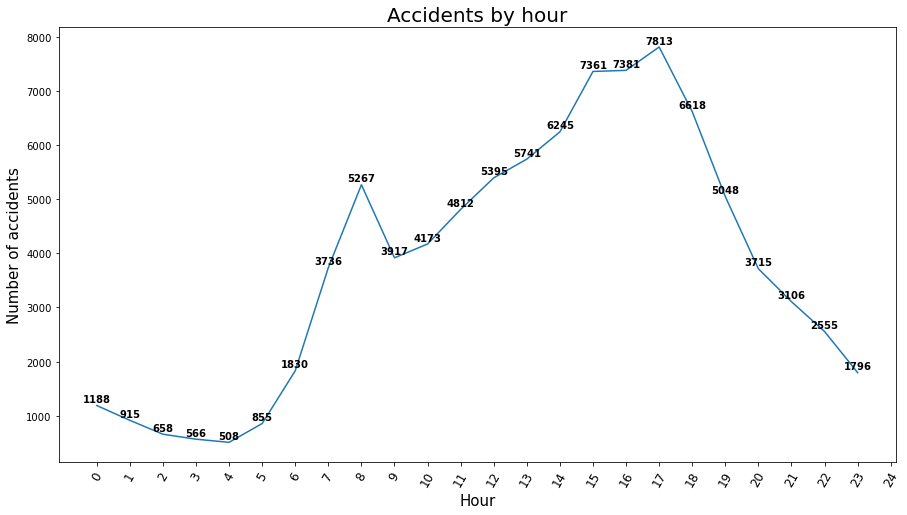

In [209]:
# create a new dataframe with the count of accidents for each hour
hourly_accidents_df = accidents.groupby('hour').size().reset_index(name='count')

# create the line plot
plt.figure(figsize=(15, 8))
plt.plot(hourly_accidents_df['hour'], hourly_accidents_df['count'])

# add labels and titles to the plot
plt.xlabel('Hour', fontsize=15)
plt.ylabel('Number of accidents', fontsize=15)
plt.title('Accidents by hour', fontsize=20)
plt.xticks(list(range(0, 25)), rotation=60, fontsize=12)
# add counts
for i, v in enumerate(hourly_accidents_df['count']):
    plt.text(i, v+25, "%d" %v, ha="center", va='bottom', fontweight='extra bold')

plt.show()

__Conclusion: This patterns makes sense because these are typically the busiest hours of the day, with more people commuting to and from work or school.__

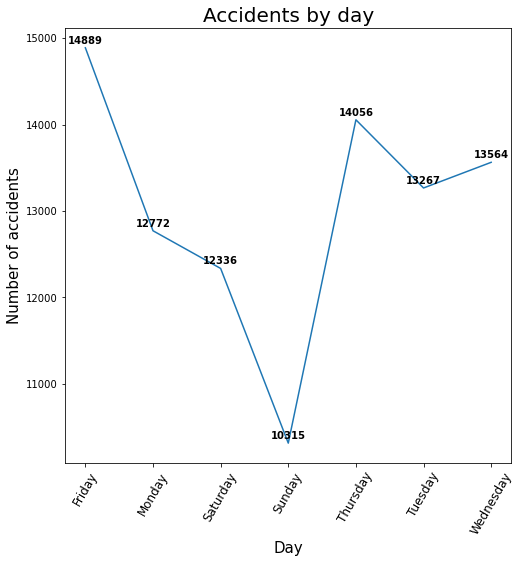

In [222]:
daily_accidents = accidents.groupby('day_of_week').size().reset_index(name='count')

# create the line plot
plt.figure(figsize=(8, 8))
plt.plot(daily_accidents['day_of_week'], daily_accidents['count'])

# add labels and titles to the plot
plt.xlabel('Day', fontsize=15)
plt.ylabel('Number of accidents', fontsize=15)
plt.title('Accidents by day', fontsize=20)
plt.xticks(rotation=60, fontsize=12)
# add counts
for i, v in enumerate(daily_accidents['count']):
    plt.text(i, v+25, "%d" %v, ha="center", va='bottom', fontweight='extra bold')

plt.show()

__Conclusions:__
1. One possible explanation for the higher number of accidents on Fridays could be that people are more likely to be rushing to finish work or school tasks before the weekend begins, which could lead to more reckless driving and a higher likelihood of accidents.
2. Friday evenings and nights are often associated with social activities such as going out to bars or parties, which could lead to more drinking and driving, which is a known risk factor for accidents.
3. people tend to drive less on weekends, especially on Sundays and Saturdays, when many businesses are closed and people may be spending more time at home with their families. 

**_to do_:**
1. We need to filter the data based on the events that have the highest number of accidents, in such a way we find other factors

In [248]:
# not needed anymore
del accident_counts
del daily_accidents
del hourly_accidents_df

### Q.2: Are there any patterns in the time of day/ day of the week when major incidents occur? 

In [229]:
# accidents.columns

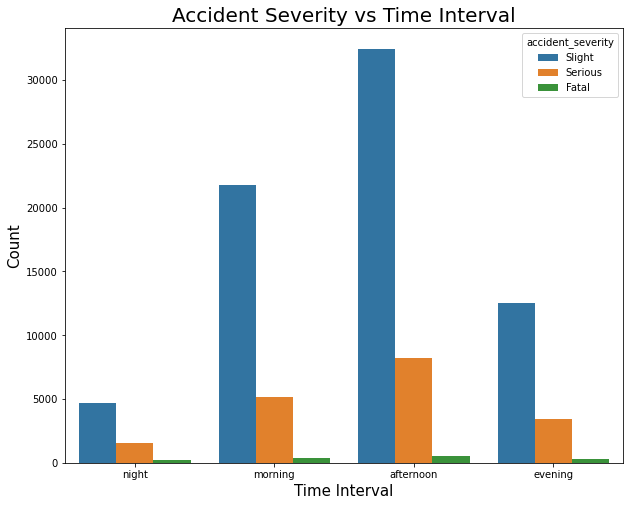

In [241]:
plt.figure(figsize=(10, 8))
sns.countplot(data = accidents, x = 'time_interval', hue='accident_severity')
plt.title('Accident Severity vs Time Interval', fontsize=20)
plt.xlabel('Time Interval', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

In [240]:
# know_note('Slight', 'Serious', 'Fatal')
# fatal accidents involving 3+ casualties (source: competition site)

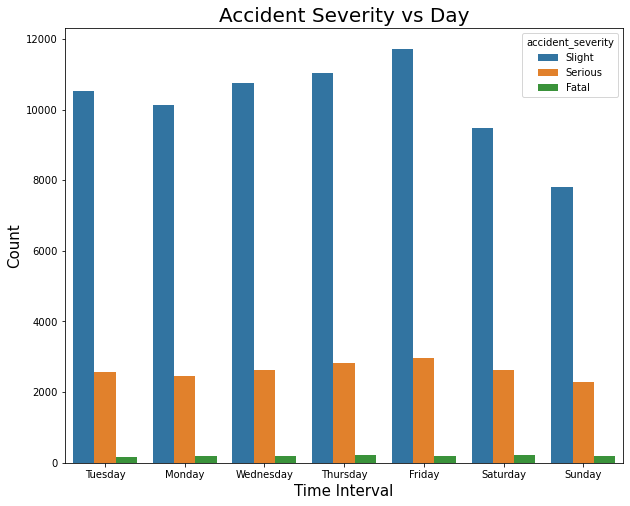

In [245]:
plt.figure(figsize=(10, 8))
sns.countplot(data = accidents, x = 'day_of_week', hue='accident_severity')
plt.title('Accident Severity vs Day', fontsize=20)
plt.xlabel('Time Interval', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

__Almost same percentage of severities__ 

In [246]:
accidents.columns

Index(['accident_index', 'accident_year', 'accident_reference', 'longitude',
       'latitude', 'accident_severity', 'number_of_vehicles',
       'number_of_casualties', 'date', 'day_of_week', 'time',
       'first_road_class', 'first_road_number', 'road_type', 'speed_limit',
       'junction_detail', 'junction_control', 'second_road_class',
       'second_road_number', 'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area', 'hour', 'time_interval'],
      dtype='object')

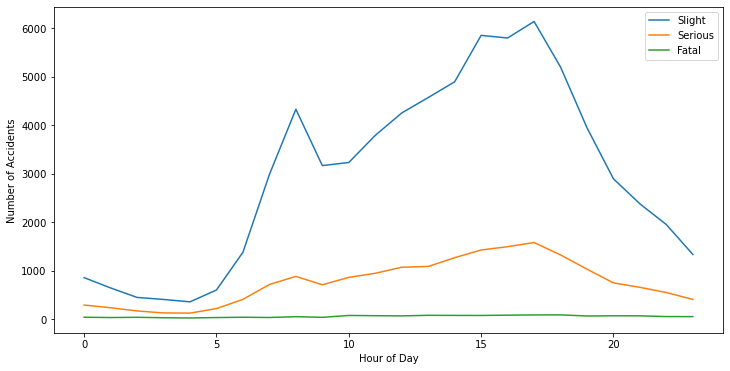

In [254]:
accident_counts = accidents.groupby(['accident_severity', 'hour'])['accident_index'].count().reset_index(name='count')

# plot the accident counts by hour for each day of the week
plt.figure(figsize=(12, 6))
for i, s in enumerate(accidents.accident_severity.unique()):
    plt.plot(accident_counts[accident_counts['accident_severity'] == s]['hour'], accident_counts[accident_counts['accident_severity'] == s]['count'], label=s)
plt.legend()
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')
plt.show()

__Q: When fatal accidents happened?__

In [261]:
fatal_accidents = accidents[accidents['accident_severity'] == 'Fatal']
fatal_accidents.reset_index(inplace=True, drop=True)

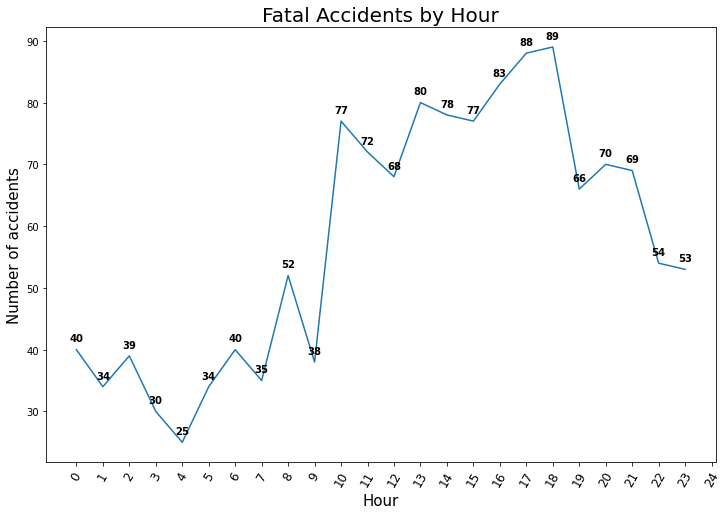

In [274]:
fatal_severities = fatal_accidents.groupby('hour').size().reset_index(name='count')

# create the line plot
plt.figure(figsize=(12, 8))
plt.plot(fatal_severities['hour'], fatal_severities['count'])

# add labels and titles to the plot
plt.xlabel('Hour', fontsize=15)
plt.ylabel('Number of accidents', fontsize=15)
plt.title('Fatal Accidents by Hour', fontsize=20)
plt.xticks(list(range(0, 25)),rotation=60, fontsize=12)
# add counts
for i, v in enumerate(fatal_severities['count']):
    plt.text(i, v+1, "%d" %v, ha="center", va='bottom', fontweight='extra bold')

plt.show()

__No thing new rush hours (school, work) time as before__

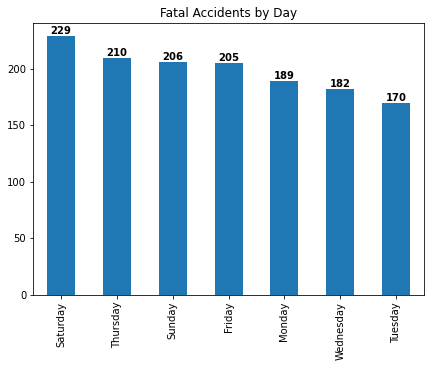

In [283]:
# days
plt.figure(figsize=(7, 5))
fatal_accidents.day_of_week.value_counts().plot(kind='bar')
for i, v in enumerate(fatal_accidents.day_of_week.value_counts().values):
    plt.text(i, v, f'{v}', ha="center", va='bottom', fontweight='extra bold')
plt.title('Fatal Accidents by Day')
plt.show()

In [297]:
del accident_counts

### Q.3: What characteristics stand out in major incidents compared with other accidents?
__In other words what makes fatal accidents .... fatal ^_^__

In [287]:
accidents.columns

Index(['accident_index', 'accident_year', 'accident_reference', 'longitude',
       'latitude', 'accident_severity', 'number_of_vehicles',
       'number_of_casualties', 'date', 'day_of_week', 'time',
       'first_road_class', 'first_road_number', 'road_type', 'speed_limit',
       'junction_detail', 'junction_control', 'second_road_class',
       'second_road_number', 'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area', 'hour', 'time_interval'],
      dtype='object')

In [293]:
print('*Freq Of Casualties*')
print('Count\tFreq')
accidents.number_of_casualties.value_counts(normalize=True)

*Freq Of Casualties*
Count	Freq


1     0.813178
2     0.134004
3     0.035242
4     0.011656
5     0.003827
6     0.001261
7     0.000471
8     0.000154
9     0.000077
11    0.000044
10    0.000033
17    0.000011
41    0.000011
13    0.000011
12    0.000011
19    0.000011
Name: number_of_casualties, dtype: float64

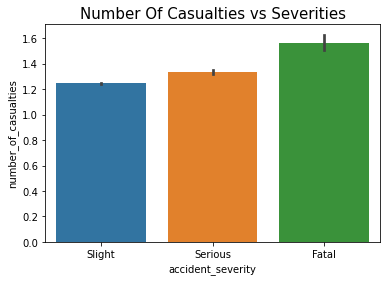

In [309]:
sns.barplot(data=accidents, x = 'accident_severity', y='number_of_casualties')
plt.title('Number Of Casualties vs Severities', fontsize=15)
plt.show()

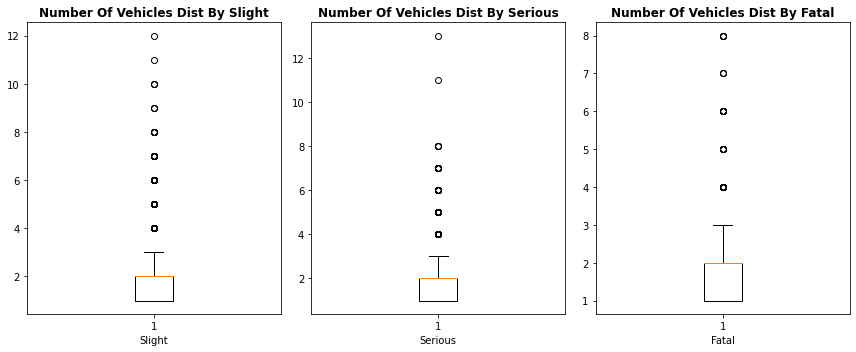

In [328]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 5))

for severity, ax in zip(accidents['accident_severity'].unique(), axes.flatten()):
    ax.boxplot(accidents[accidents.accident_severity == severity]['number_of_vehicles'])
    ax.set_title(f'Number Of Vehicles Dist By {severity}', fontweight='extra bold')
    ax.set_xlabel(f'{severity}')

plt.tight_layout()

In [18]:
accidents.columns

Index(['accident_index', 'accident_year', 'accident_reference', 'longitude',
       'latitude', 'accident_severity', 'number_of_vehicles',
       'number_of_casualties', 'date', 'day_of_week', 'time',
       'first_road_class', 'first_road_number', 'road_type', 'speed_limit',
       'junction_detail', 'junction_control', 'second_road_class',
       'second_road_number', 'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area', 'hour', 'time_interval'],
      dtype='object')

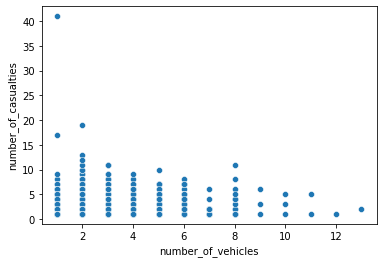

In [20]:
# correlation

sns.scatterplot(data=accidents, x='number_of_vehicles',y='number_of_casualties')
plt.show()

__What about road type?__

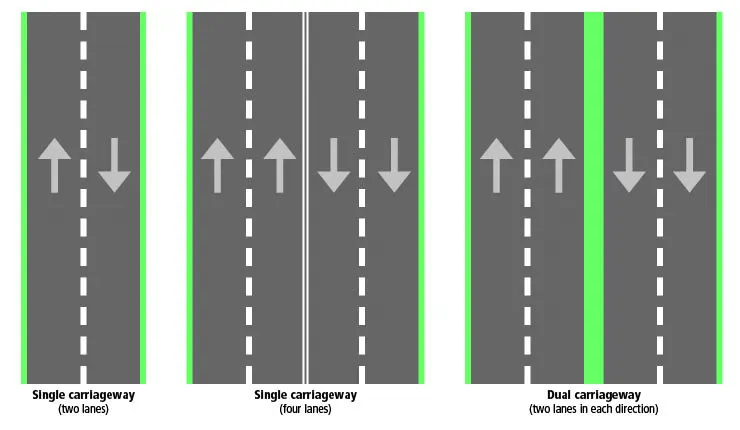

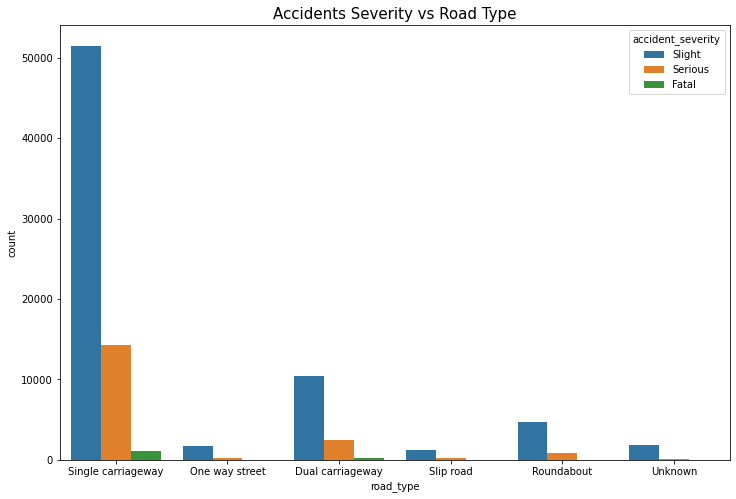

In [338]:
plt.figure(figsize=(12, 8))
sns.countplot(data=accidents, x='road_type', hue='accident_severity')
plt.title('Accidents Severity vs Road Type', fontsize=15)
plt.show()

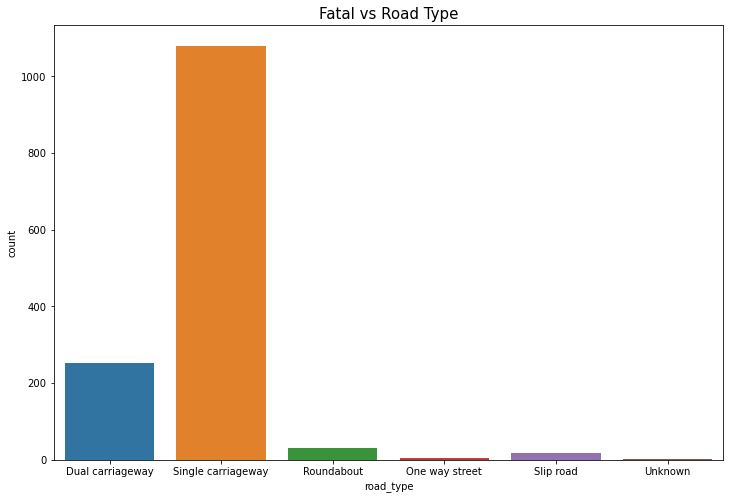

In [339]:
plt.figure(figsize=(12, 8))
sns.countplot(data=fatal_accidents, x='road_type')
plt.title('Fatal vs Road Type', fontsize=15)
plt.show()

__Most of accidents in general happened in a single carriageway. Reasons:__
1. Limited space: Single carriageways typically have narrower lanes and less space than dual carriageways or motorways.
2. Lack of separation: Single carriageways do not have a physical barrier separating the lanes.

In [353]:
single = accidents[np.logical_and(accidents.road_type == 'Single carriageway', accidents.urban_or_rural_area != 'Unallocated')]

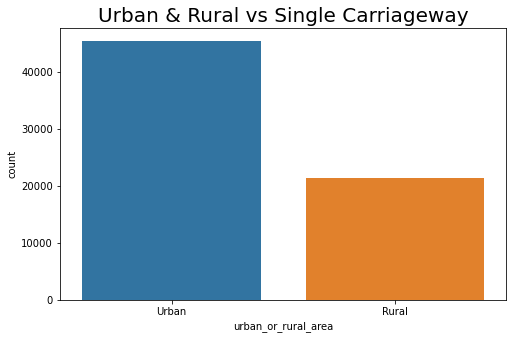

In [361]:
# single carriageway in rural and urban
plt.figure(figsize=(8, 5))
plt.title('Urban & Rural vs Single Carriageway', fontsize=20)
sns.countplot(data = single[single.urban_or_rural_area != 'Unallocated'], x = 'urban_or_rural_area')
plt.show()

__Important Conclusion: Most of accidents happened is in Urban-Single Carriageway and its totally reasonable thing!__


__speed limit__

In [373]:
accidents.speed_limit.value_counts()[:-1]

30    52260
60    11408
20    11183
40     7867
70     4687
50     3782
Name: speed_limit, dtype: int64

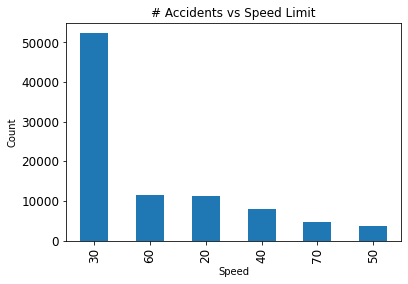

In [372]:
accidents.speed_limit.value_counts()[:-1].plot(kind='bar', fontsize=12)
plt.title('# Accidents vs Speed Limit')
plt.xlabel('Speed')
plt.ylabel('Count')
plt.show()

__Conclusion: make sense as usual. Since speed limit is small, breaking it will be easier. Which leads to casualities__
1. Lower speed limits are generally enforced in areas with higher pedestrian and vehicle traffic, such as urban areas, and on roads with more curves or hills that can impact visibility.

__Junctions__

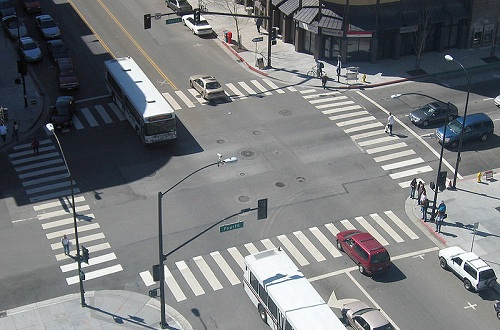

In [381]:
accidents.junction_control.value_counts(normalize=True)

Give way or uncontrolled        0.438579
Data missing or out of range    0.419939
Auto traffic signal             0.114113
unknown (self reported)         0.016842
Stop sign                       0.006393
Authorised person               0.004134
Name: junction_control, dtype: float64

In [383]:
accidents.junction_detail.value_counts(normalize=True)

Not at junction or within 20 metres    0.416430
T or staggered junction                0.280990
Crossroads                             0.092424
Roundabout                             0.080330
Other junction                         0.051590
Private drive or entrance              0.020691
unknown (self reported)                0.016535
Mini-roundabout                        0.014255
More than 4 arms (not roundabout)      0.014024
Slip road                              0.012708
Data missing or out of range           0.000022
Name: junction_detail, dtype: float64

__T or staggered junction(اسم علي مسمي)__
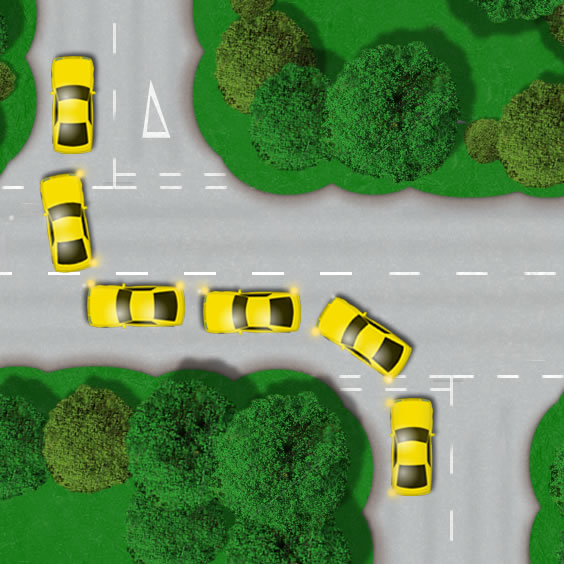

__Pedestrain__

In [26]:
pedestrains = accidents.groupby('pedestrian_crossing_human_control').size().reset_index(name='count')

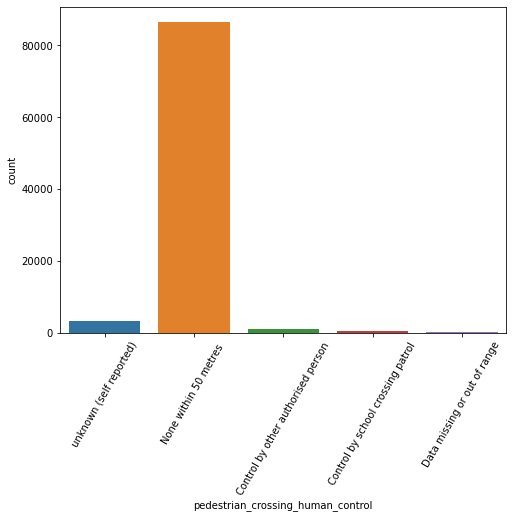

In [39]:
# pedestrian_crossing_human_control

plt.figure(figsize=(8, 6))
sns.countplot(data=accidents, x='pedestrian_crossing_human_control')
plt.xticks(rotation=60)
plt.show()

__Conclusion: We can see that most pedestrian crossings have no control within 50 meters. This means that pedestrians have to cross the road without the help of traffic signals or other traffic management measures.__

In [41]:
del pedestrains

__light conditions__

In [46]:
lights = accidents.groupby('light_conditions').size().reset_index(name='counts')
lights = lights[lights.counts > 1]

Percentage Of Accidents by Light Conditions


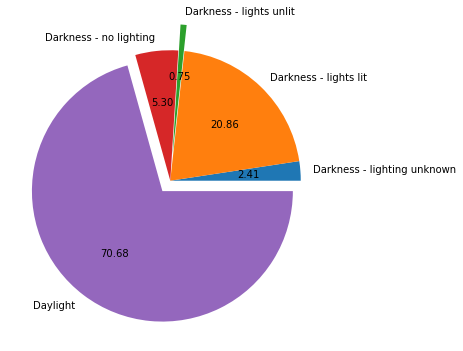

In [66]:
print('Percentage Of Accidents by Light Conditions')
plt.figure(figsize=(8, 6))
plt.pie(x=lights.counts, labels=lights.light_conditions, autopct='%.2f', explode=[0, 0, 0.2, 0, 0.1],)
plt.show()

__Conclusion: As we know from the previous plots most of accidents happened during morning and afternoon time-intervals (Day Light)__
1. There are some accidents (~=5.5%) occurred with no-lighting
2. Most of accidents occurred in darkness and the light-condition was lit
3. accidents can still happen even in well-lit areas and during daylight hours due to other factors such as driver behavior, road conditions, and weather

In [67]:
del lights

__Weather Conditions__

In [24]:
weather = accidents.groupby('weather_conditions').size().reset_index(name='counts')
weather = weather[weather.weather_conditions != 'Other']
weather = weather[weather.weather_conditions != 'Unknown']
weather = weather[weather.weather_conditions != 'Data missing or out of range']
weather.sort_values(by='counts', inplace=True)

Count Of Accidents by Weather Conditions


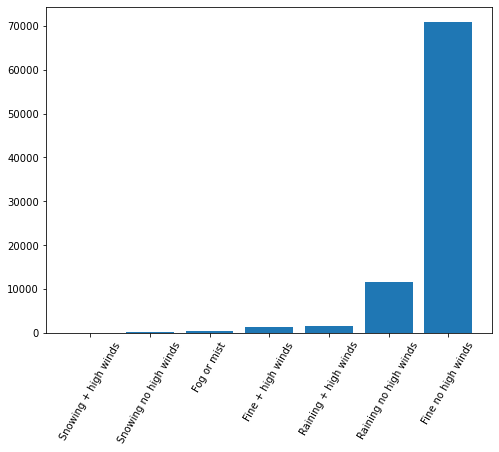

In [25]:
print('Count Of Accidents by Weather Conditions')
plt.figure(figsize=(8, 6))
plt.bar(x=weather.weather_conditions, height=weather.counts)
plt.xticks(rotation=60)
plt.show()

__Conclusion: Weather is not a crucial factor in our analysis as most of accidents weather conditions is (Fine no winds)__

### Q.4: On what areas would you recommend the planning team focus their brainstorming efforts to reduce major incidents?

__Will be done in PowerBI ^_^__

In [6]:
accidents.to_csv('UK_accidents_2020.csv')